In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


*. Chargement  du jeu de données*

In [ ]:
df = pd.read_csv('train.csv',lineterminator=None)  

FileNotFoundError: ignored

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Exploraion du dataset*

In [ ]:
print(f"Nombre exemples:{df.shape[0]} Nombre de feautres :{df.shape[1]}")

Nombre exemples:891 Nombre de feautres :12


In [ ]:
# statistique sur notre dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# les valeurs manquants :
print("total des valeurs manquantes par chaque attribut")
df.isnull().sum()

total des valeurs manquantes par chaque attribut


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
##  gérer les valeurs manquantes pour la variable age:
nmbr_ages = df["Age"].isnull().sum()
moy_age = df["Age"].mean()
print(f" nombre de variable manquants: {nmbr_ages} la moyenne de cette attribut : {moy_age}")
 # # # affectation de la moy pour les valeurs manquanes 
df['Age'] = df['Age'].fillna(moy_age)
apres_nmbr = df["Age"].isnull().sum()
print(f" nombre de valeurs manquants pour Age : {apres_nmbr}")

 nombre de variable manquants: 177 la moyenne de cette attribut : 29.69911764705882
 nombre de valeurs manquants pour Age : 0


In [ ]:
##  gérer les valeurs manquantes pour la variable Cabin:
pourcentage =(df["Cabin"].isnull().sum() / df.shape[0])*100
print(f"pourcentage des valeurs manq :{pourcentage}%")
### éliminer la colonne Cabin
df.drop( 'Cabin',axis=1,inplace=True)


pourcentage des valeurs manq :77.10437710437711%


In [ ]:
df.drop( ['PassengerId','Name','Ticket','Embarked'],axis=1,inplace=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


*Transformation des labels catégoriques en classes (OnE HOT ENCODING)*

In [ ]:
# 
genre_dict = {"male":0 , "female":1}
embrk_dict = {"S":0 , "C":1,"Q":2}




In [ ]:
df['Sex'] = df['Sex'].map(lambda gender: genre_dict[gender])


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


*Les relations entre les attributs*

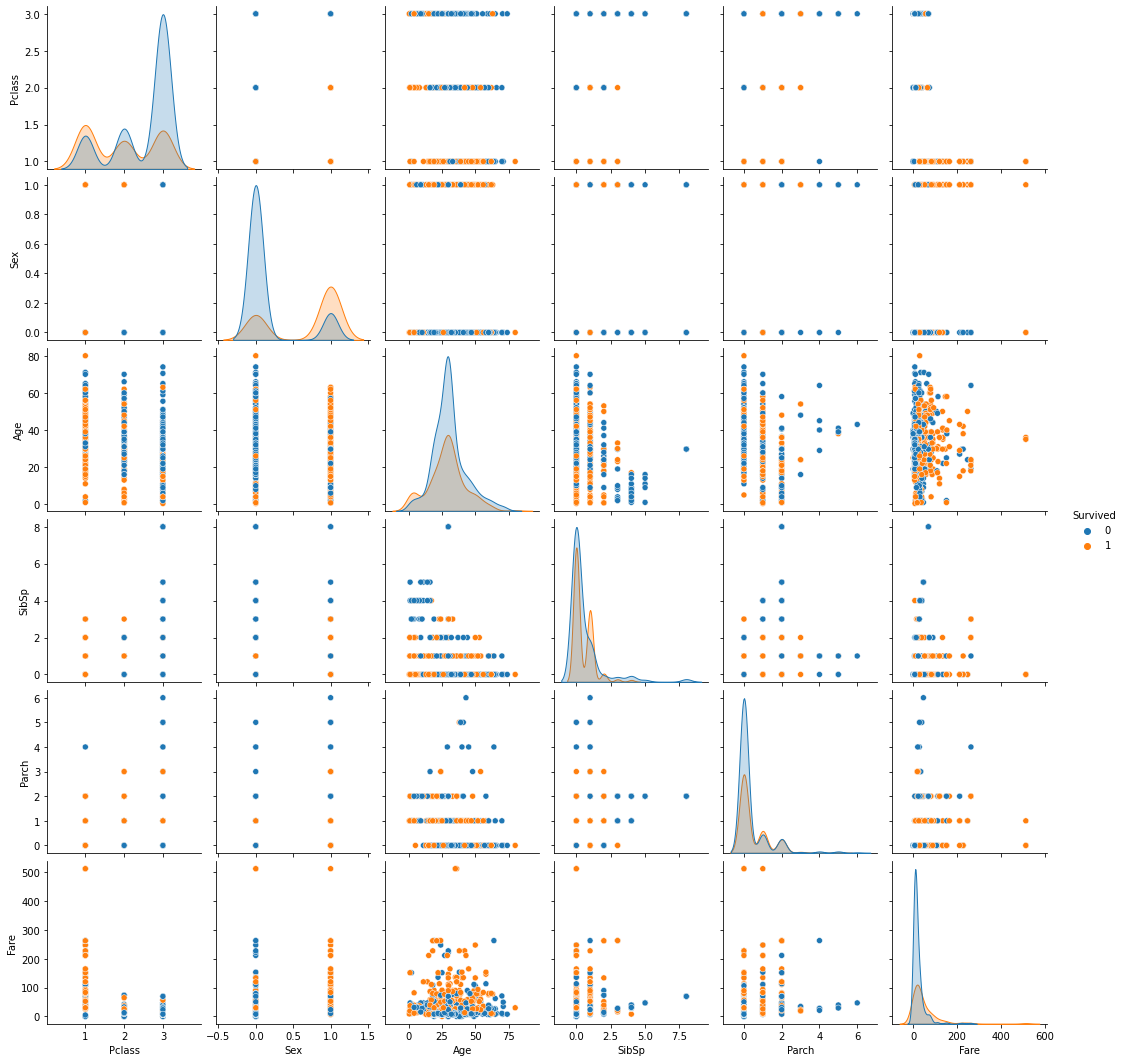

In [ ]:
sns.pairplot(df,hue='Survived')


In [ ]:
import plotly.graph_objects as go

def plot_distribution(pd_series):
    labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()
    
    pie_plot = go.Pie(labels=labels, values=counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_layout(title_text='Distribution for %s' % pd_series.name)
    
    fig.show()

In [ ]:
# split data 
X = df.drop('Survived',axis=1)
y = df['Survived']

In [ ]:
plot_distribution(df['Sex'])

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [ ]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
def Modele_n_layer_solveur(N,solv):
    solveur = ['lbfgs','sgd','adam']
    clf = MLPClassifier(solver = solv ,hidden_layer_sizes= N )
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print(f" Score :{score:.2f}  ")

**SCORE AVEC MODULE DE 3 COUCHES CACHEES (Sans normalisation et standarisation)**

In [ ]:
Modele_n_layer_solveur((150,120,10),'adam')

 Score :0.85  


*STANDARIZATION*

In [ ]:
def preprocessing(X_train,X_test):
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

In [ ]:
Modele_n_layer_solveur((150,120,100,10),'lbfgs')

 Score :0.85  


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



*Normalisation*

In [ ]:
# normalisation
df['Age'] = df['Age'] / df['Age'].max()

In [ ]:
df['Age']

0      0.275000
1      0.475000
2      0.325000
3      0.437500
4      0.437500
         ...   
886    0.337500
887    0.237500
888    0.371239
889    0.325000
890    0.400000
Name: Age, Length: 891, dtype: float64

In [ ]:
Modele_n_layer_solveur((100,200,10),'lbfgs')

 Score :0.85  


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

